In [57]:
import gzip
import numpy as np
import nltk

In [109]:
def load_wvec(fname, vocab=10000):                                                                                                                                                                                      
    """                                                                                                                                                                                                              
    Loads 300x1 word vecs from Google (Mikolov) word2vec                                                                                                                                                             
    """                                                                                                                                                                                                              
    word_vecs = {}                                                                                                                                                                                                   
    with gzip.open(fname, "rb") as f:                                                                                                                                                                                     
        header = f.readline()                                                                                                                                                                                        
        vocab_size, layer1_size = map(int, header.split())                                                                                                                                                           
        binary_len = np.dtype('float32').itemsize * layer1_size
        
        vecs = np.zeros((vocab, layer1_size))
        print(vecs.shape)
        words = []
        for i, line in enumerate(range(vocab)):
            word = []
            while True:                                                                                                                                                                                              
                ch = f.read(1)
                if ch == b' ':
                    word = ''.join(word)
                    break
                if ch != b'\n':
                    word.append(ch.decode("utf-8", "ignore"))                
            vecs[i] = np.fromstring(f.read(binary_len), dtype='float32')                                                                                                                                  
            words.append(word)
# #             else:                                                                                                                                                                                                    
# #                 f.read(binary_len)                                                                                                                                                                                   
    return (vecs, words)

In [52]:
!gzip GoogleNews-vectors-negative300.bin

In [217]:
word_vecs, words  = load_wvec("GoogleNews-vectors-negative300.bin.gz", 10000)

(10000, 300)


In [186]:
from nltk import UnigramTagger
import nltk.tag
from nltk.tag.tnt           import TnT


In [201]:
tags = [nltk.pos_tag([w if w else "#"])[0][1] for w in words]

In [202]:
tags[0]

'NN'

In [85]:

get_ipython().magic('matplotlib inline')

import sklearn
import numpy as np
import sklearn.manifold
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy.linalg
from matplotlib import offsetbox

In [132]:
from matplotlib.font_manager import FontProperties

In [219]:
def plot_embedding(X, title=None, size=(3,3)):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=size)
    ax = plt.subplot(111)
    ids = {}
#     for i in range(X.shape[0]):
#         lstype = 3

#         plt.scatter(X[i, 0], X[i, 1], 
#                  color=plt.cm.Set1((lstype -1) / 3))
#         i += 1    
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            #for i, txt in enumerate(n):
            
            letter = words[i]
            if not letter or letter[0] in ["<", "#"]: continue
#             tag = tags[i][:2]
#             if tag not in ids:
#                 ids[tag] = len(ids)
            ls_type = 1 #ids[tag]
            if len(letter) > 20:
                letter = letter[:20] + "..."
            
            ax.annotate(letter, (X[i, 0], X[i, 1])) #color=plt.cm.Set1((lstype) / len(ids)))
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 1e-2 :
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.TextArea(letter, textprops={"size":25}),
#                 offsox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i], fontsize=25)
            ax.add_artist(imagebox)

    plt.xticks([]), plt.yticks([])
    plt.axis('off')

    if title is not None:
        plt.title(title)
    plt.subplots_adjust(left=-0.2, right=1.2, top=1.2, bottom=-0.2)
    plt.savefig("graph.png", dpi=100)

In [218]:
#t = sklearn.decomposition.TruncatedSVD(n_components=2)

t = sklearn.manifold.TSNE()
X_sne = t.fit_transform(word_vecs)

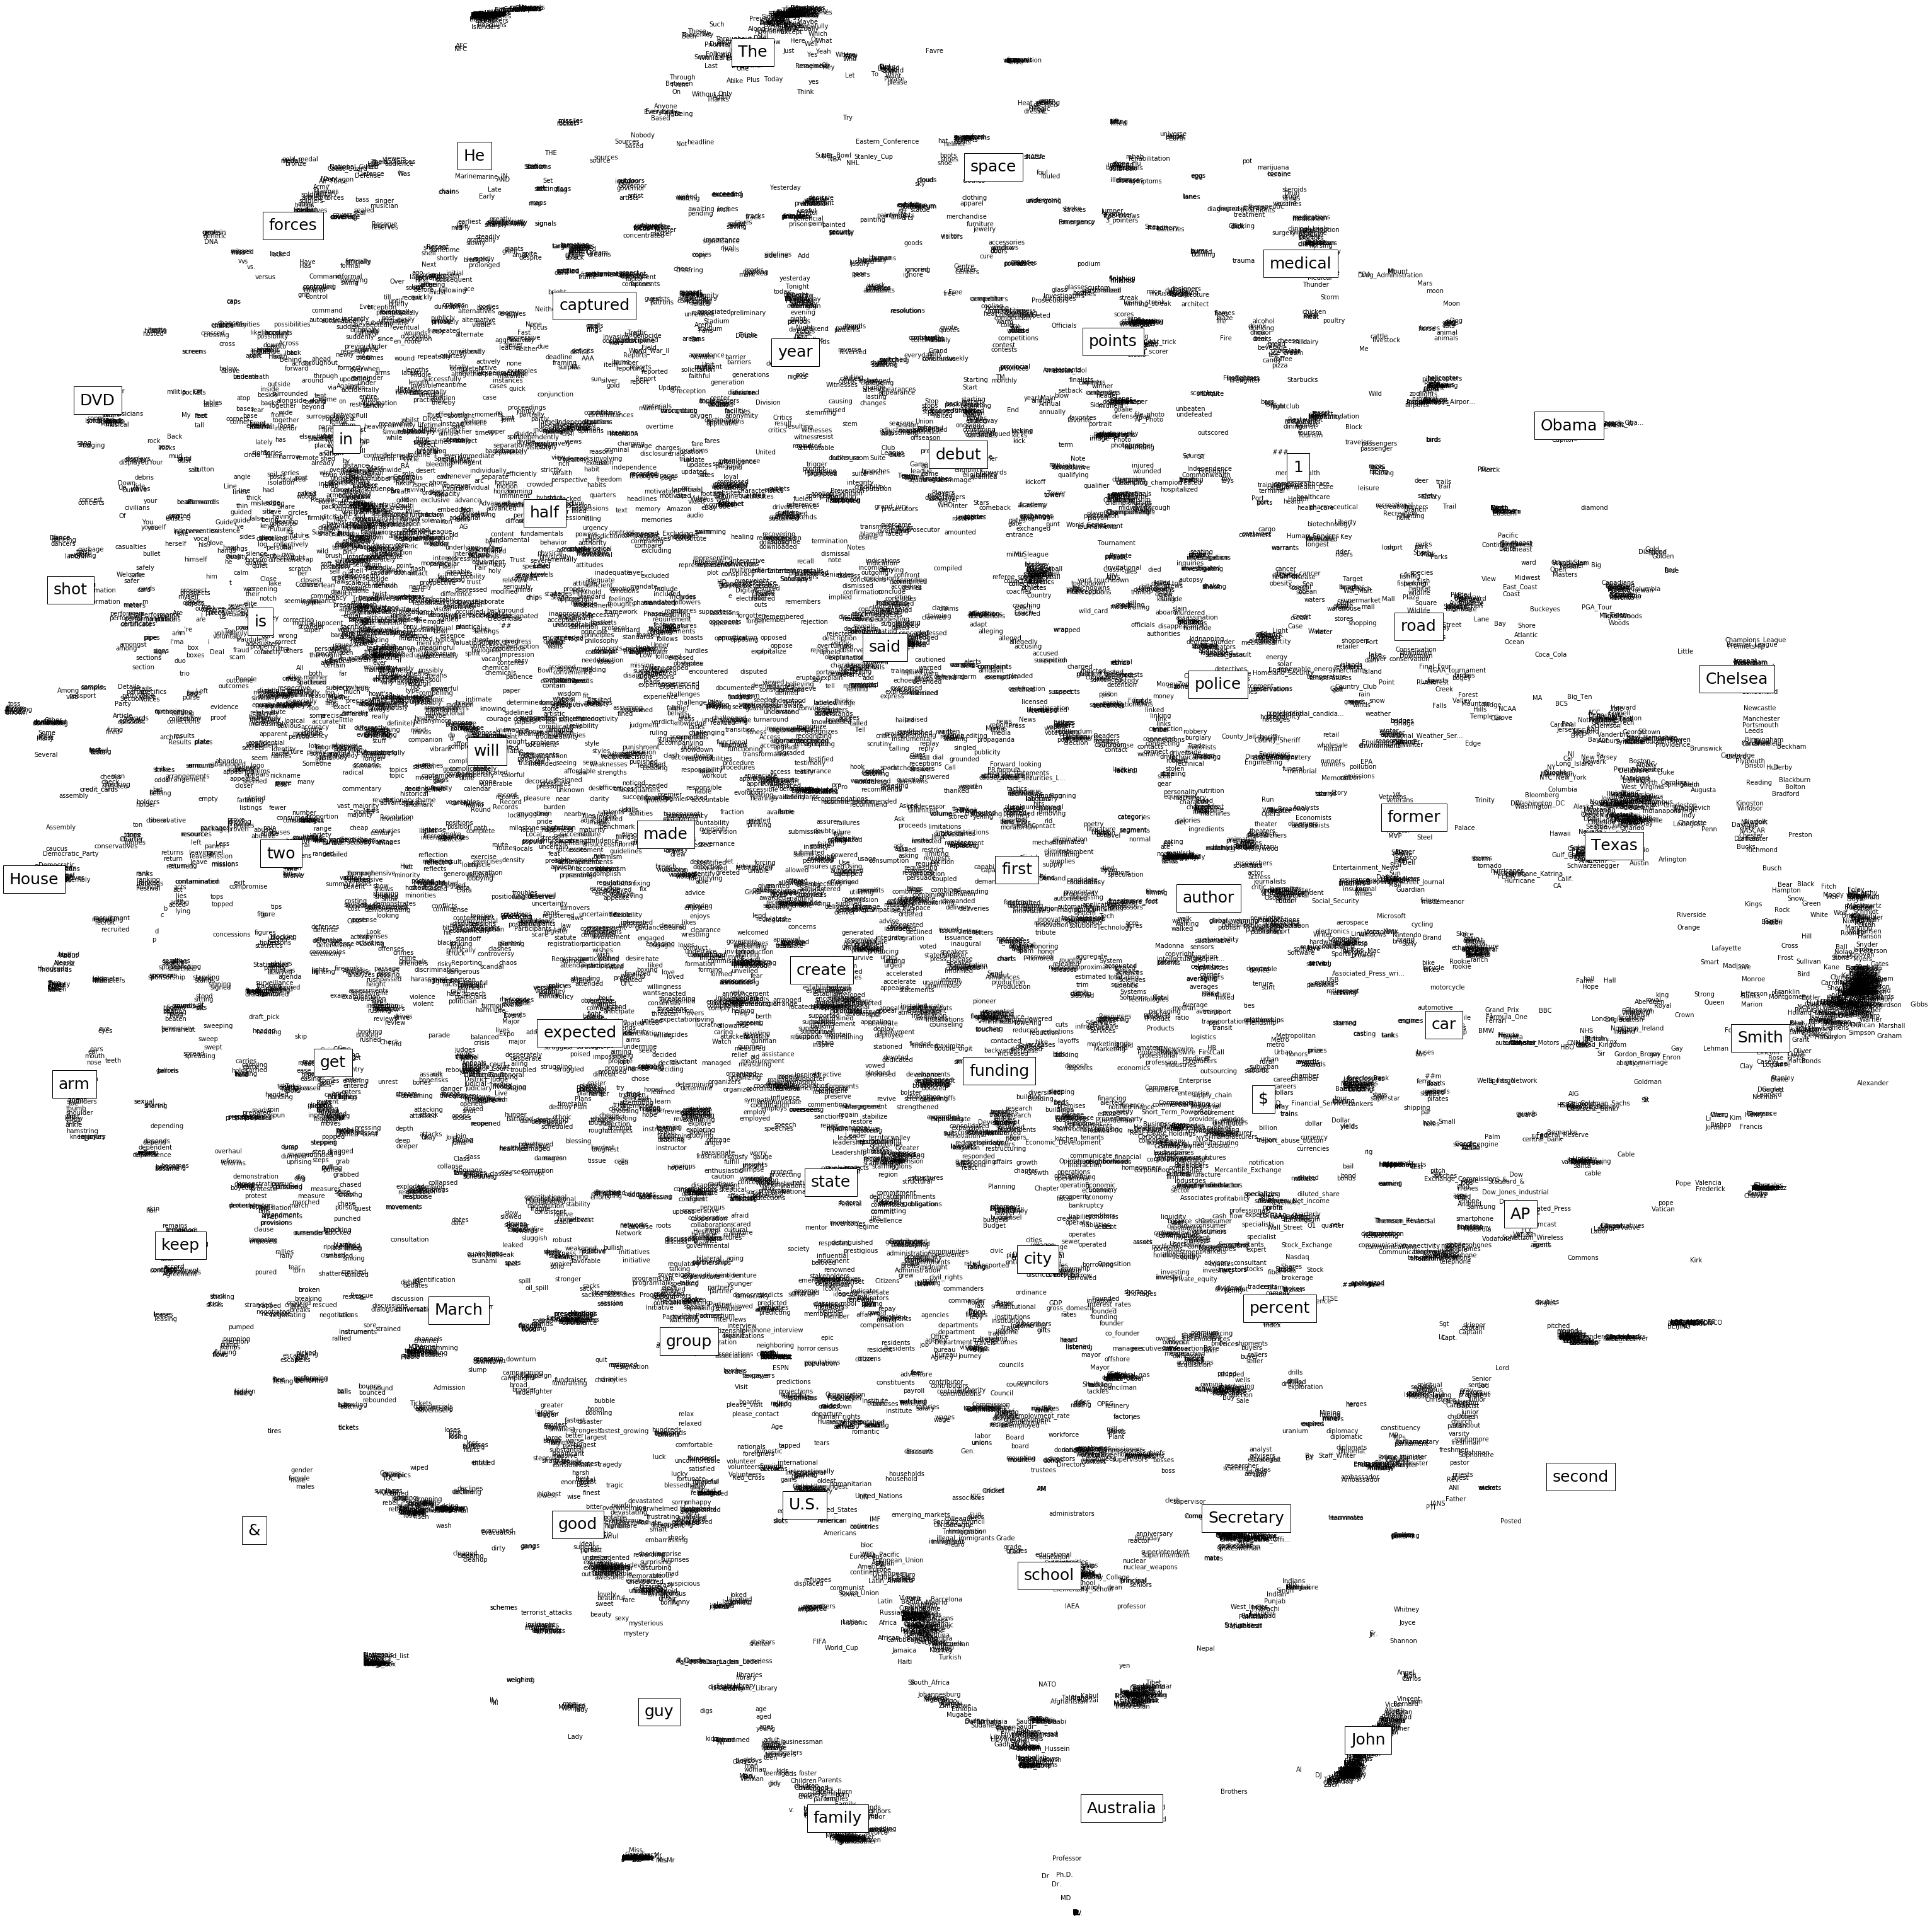

In [220]:
plot_embedding(X_sne[:10000], None, (30,30))

In [229]:
from numpy.random import random

from bokeh.plotting import figure, show, output_file

def mscatter(p, x, y, marker):
    p.scatter(x, y, marker=marker, size=15,
              line_color="navy", fill_color="orange", alpha=0.5)

def mtext(p, x, y, text):
    p.text(x, y, text=[text],
           text_color="black", text_align="center", text_font_size="10pt")

p = figure(title="Word Embeddings", tools = "pan,wheel_zoom,box_zoom,reset,save", plot_width=400, plot_height=400)
p.grid.grid_line_color = None
p.background_fill_color = "#eeeeee"

N = 10

for i in range(1000):
    mtext(p, X_sne[i, 0], X_sne[i, 1], words[i])


output_file("markers.html", title="markers.py example")

show(p)  # open a browser

ERROR:/usr/local/lib/python3.4/dist-packages/bokeh/core/validation/check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 21352e2a-4d16-4c65-921b-d87d3968060d
ERROR:/usr/local/lib/python3.4/dist-packages/bokeh/core/validation/check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: f234e4a4-4336-4495-94ec-2f2e0665ed67
